In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [3]:
input_path = r'/media/lumin/DATA/DATA_DEVRIM Results - 20231206_190647/DATA_DEVRIM Results - 20231207_145750/20231207_145750_Confinement ratio.csv'
data = pd.read_csv(input_path)

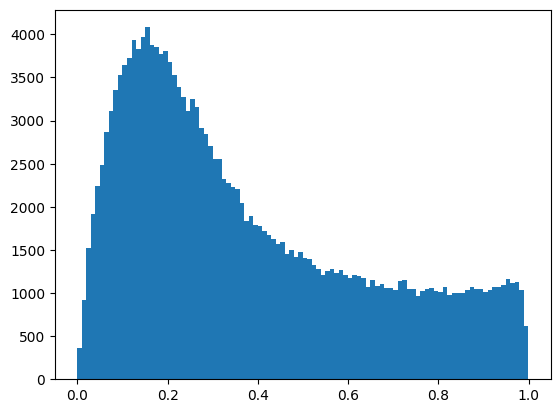

In [4]:

flat_list = []
for l in data.r_conf:
    split = l.split(', ')
    split[0] = split[0][1:]
    split[len(split)-1] = split[len(split)-1][:-1]
    for i in split:
        flat_list.append(float(i))

flat_list

# a = flat_list[45].split(', ')
# # a.remove('[')
# print(type(a[0]))
# a[0][1:]
# # a
# len(a)
# a[438][:-1]
plt.hist(flat_list,bins=100)
plt.show()


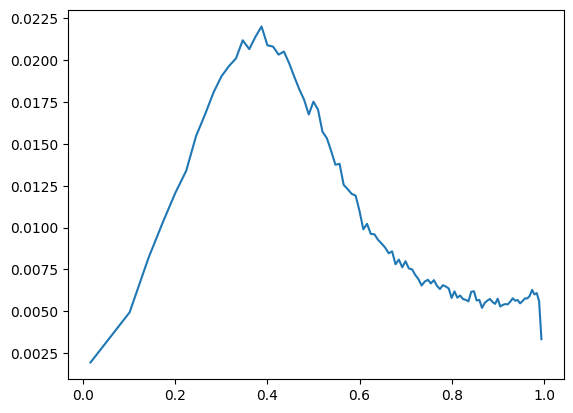

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [5]:
counts, bins = np.histogram(flat_list,bins=100)
len(bins)
bins = bins[:-1]
plt.plot(np.sqrt(bins),counts/sum(counts))
plt.show()
plt.close

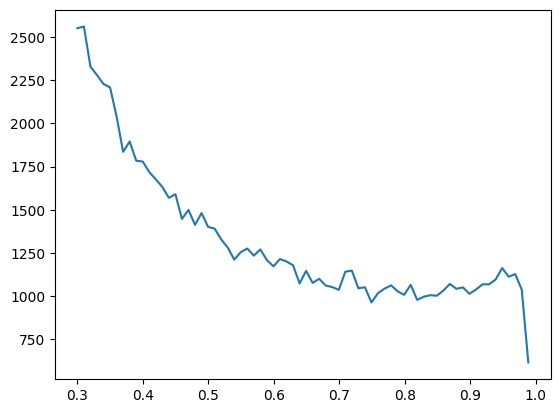

In [7]:
plt.plot(bins[30:100],counts[30:100])
plt.show()

In [8]:
z = np.polyfit(bins[30:90],np.log10(counts[30:90]/sum(counts)),5)
print(z)

[ 12.33155559 -30.1964062   25.67470668  -6.59817243  -2.23587998
  -1.06696773]


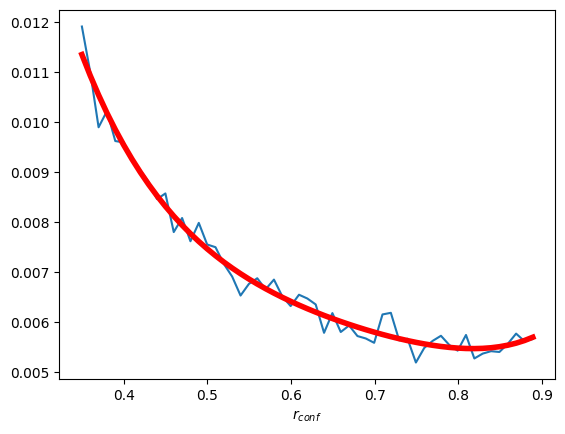

In [9]:
plt.plot(bins[35:90],(counts[35:90]/sum(counts)),label="Normalized counts")
plt.plot(bins[35:90],10**(np.polyval(z,bins[35:90])),linewidth=4,color ='r',label="Fit")
plt.xlabel(r"$r_{conf}$")
plt.show()

In [10]:
def pprime(x):
    return 5*z[0]*x**4 + 4*z[1]*x**3 + 3*z[2]*x**2 + 2*z[3]*x + z[4]

from scipy.optimize import newton
result = newton(pprime,0.8)
result

0.8174697846972505

In [ ]:
tracks = pd.read_csv(r'/media/baptiste/Windows/Users/LUMIN10/Documents/Test Devrim Results - 20230403_151924/Test Devrim/20230314_KG_Qdot_CS005R_0005_50ms_example.nd2')